In [11]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import re
import json

import sys
sys.path.insert(0, '../../')
import util.metrics as metrics
from util.metrics import StreamMetrics, StreamMetricsList
import util.misc as misc

ROOT_DIRECTORY = "../../"
BASE_DIRECTORY = f"{ROOT_DIRECTORY}/results/intra-zone-single-stream/packet-size/"
SECURE_DIRECTORY = f"{BASE_DIRECTORY}/secure/"
INSECURE_DIRECTORY = f"{BASE_DIRECTORY}/insecure/"


def get_packet_sizes():
    # Assumes the sizes are the same between secure, insecure 
    # directories!
    # Directory names are of the form 'size-128', and so on.
    directories = os.listdir(SECURE_DIRECTORY)
    return sorted(
        [int(re.search(r"size-([0-9]+)", directory)[1]) 
         for directory in directories]
    )


packet_sizes = get_packet_sizes()

secure_directories = [f"{SECURE_DIRECTORY}/size-{packet_size}/"
                      for packet_size in packet_sizes]

insecure_directories = [f"{INSECURE_DIRECTORY}/size-{packet_size}/"
                        for packet_size in packet_sizes]

secure_datas = StreamMetricsList([StreamMetrics(directory, skip=10)
                                  for directory in secure_directories])

insecure_datas = StreamMetricsList([StreamMetrics(directory, skip=10)
                                    for directory in insecure_directories])

print(f"PACKET SIZES:\t{packet_sizes}")

print(f"SECURE LATENCIES:\t{secure_datas.mean_latency()}")
print(f"INSECURE LATENCIES:\t{insecure_datas.mean_latency()}")

print(f"SECURE THROUGHPUTS:\t{secure_datas.mean_throughput()}")
print(f"INSECURE THROUGHPUTS:\t{insecure_datas.mean_throughput()}")

print(f"SECURE JITTERS:\t{secure_datas.mean_jitter()}")
print(f"INSECURE JITTERS:\t{insecure_datas.mean_jitter()}")

print(f"SECURE DROP RATE:\t{secure_datas.drop_rate()}")
print(f"INSECURE DROP RATE:\t{insecure_datas.drop_rate()}")




PACKET SIZES:	[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]
SECURE LATENCIES:	[1.53940e-05 2.33940e-05 3.13940e-05 3.93940e-05 4.73940e-05 5.53940e-05
 6.33940e-05 7.13940e-05 7.93940e-05 8.73940e-05 9.53940e-05 1.03394e-04
 1.11394e-04 1.19394e-04 1.27394e-04 1.35394e-04 1.43394e-04 1.51394e-04
 1.59394e-04 1.67394e-04 1.75394e-04 1.83394e-04 1.91394e-04 1.99394e-04
 2.07394e-04 2.15394e-04 2.23394e-04 2.31394e-04 2.39394e-04]
INSECURE LATENCIES:	[1.53640e-05 2.33640e-05 3.13640e-05 3.93640e-05 4.73640e-05 5.53640e-05
 6.33640e-05 7.13640e-05 7.93640e-05 8.73640e-05 9.53640e-05 1.03364e-04
 1.11364e-04 1.19364e-04 1.27364e-04 1.35364e-04 1.43364e-04 1.51364e-04
 1.59364e-04 1.67364e-04 1.75364e-04 1.83364e-04 1.91364e-04 1.99364e-04
 2.07364e-04 2.15364e-04 2.23364e-04 2.31364e-04 2.39364e-04]
SECURE THROUGHPUTS:	[62500. 62500. 62500. 62500. 62500. 62500. 62500. 62500. 62500. 6

<Figure size 2560x1920 with 0 Axes>

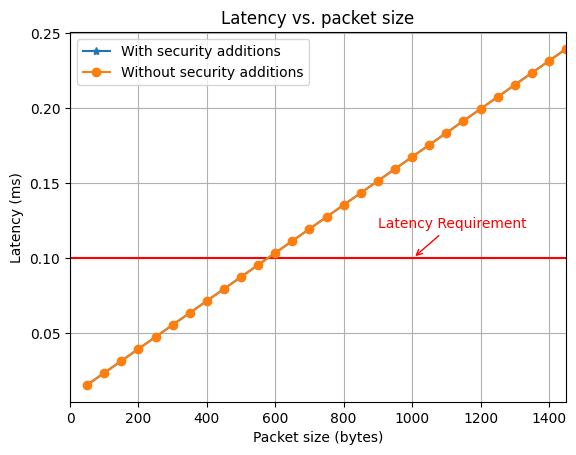

In [12]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.axhline(0.1, color='red')
ax.plot(packet_sizes, secure_datas.mean_latency() * 1000, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.mean_latency() * 1000, 'o-', label="Without security additions")
ax.annotate("Latency Requirement", xy=(1003, 0.10), xytext=(900, 0.12),
             color='red',
             arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Latency (ms)")
ax.set_title("Latency vs. packet size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/latency.png")

<Figure size 2560x1920 with 0 Axes>

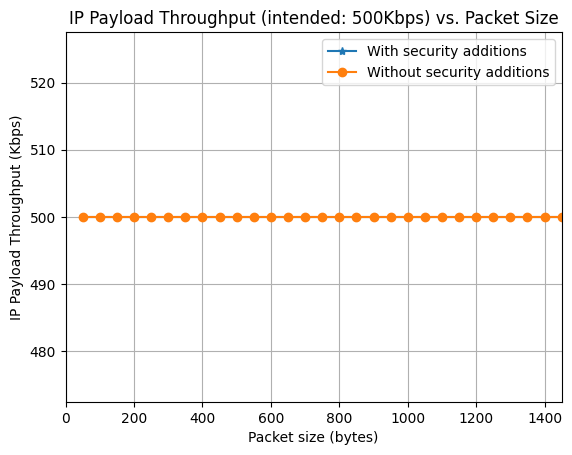

In [13]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_datas.mean_throughput() / 1000 * 8, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.mean_throughput() / 1000 * 8, 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("IP Payload Throughput (Kbps)")
ax.set_title("IP Payload Throughput (intended: 500Kbps) vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/throughput.png")

<Figure size 2560x1920 with 0 Axes>

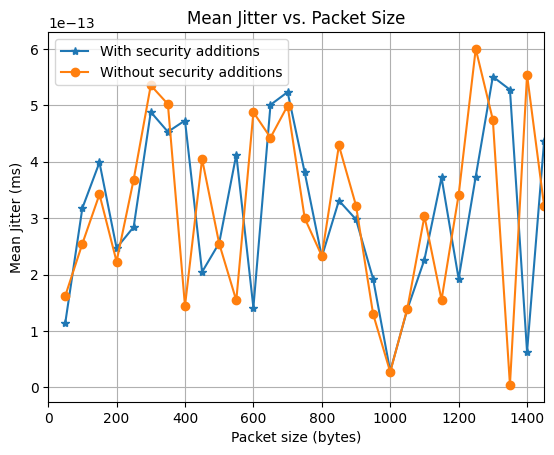

In [14]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_datas.mean_jitter() * 1000, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.mean_jitter() * 1000, 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Mean Jitter (ms)")
ax.set_title("Mean Jitter vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/jitter.png")

<Figure size 2560x1920 with 0 Axes>

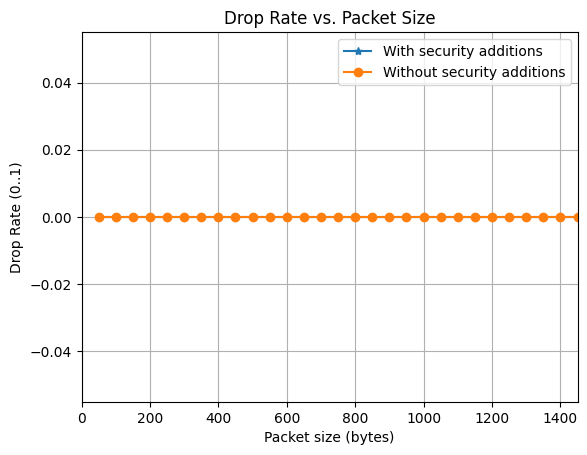

In [15]:

plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_datas.drop_rate(), '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.drop_rate(), 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Drop Rate (0..1)")
ax.set_title("Drop Rate vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/drop_rate.png")